In [2]:
import numpy as np
import matplotlib.pyplot as plt

path = '/home/qsim-rad/LabRAD/data/'

In [77]:
sets = [48, 47, 41,42,43,46]
tickle_sets = [659, 657, 653, 652, 651, 650]
fhigh = [675.742, 675.880, 675.960, 677.108, 677.175, 675.529] #error in reading ~100 Hz, ish...
flow = [565.490, 566.312, 570.849, 571.479, 572.838, 571.439]
M5 = [0.1,0.2,0.4,0.5, 0.6, 0.7]
data = []
tickles = []

for num in sets:
    ss = path + 'image_fluorescence.dir/000%s - image_fluorescence.csv'  % (str(num))
    data.append(np.loadtxt(ss, delimiter = ','))
    
for num in tickle_sets:
    ss = path + 'ticklescan.dir/00%s - ticklescan.csv' % (str(num))
    tickles.append(np.loadtxt(ss, delimiter = ','))
    
asym = []
for i in range(6):
    asym.append(fhigh[i]/flow[i])

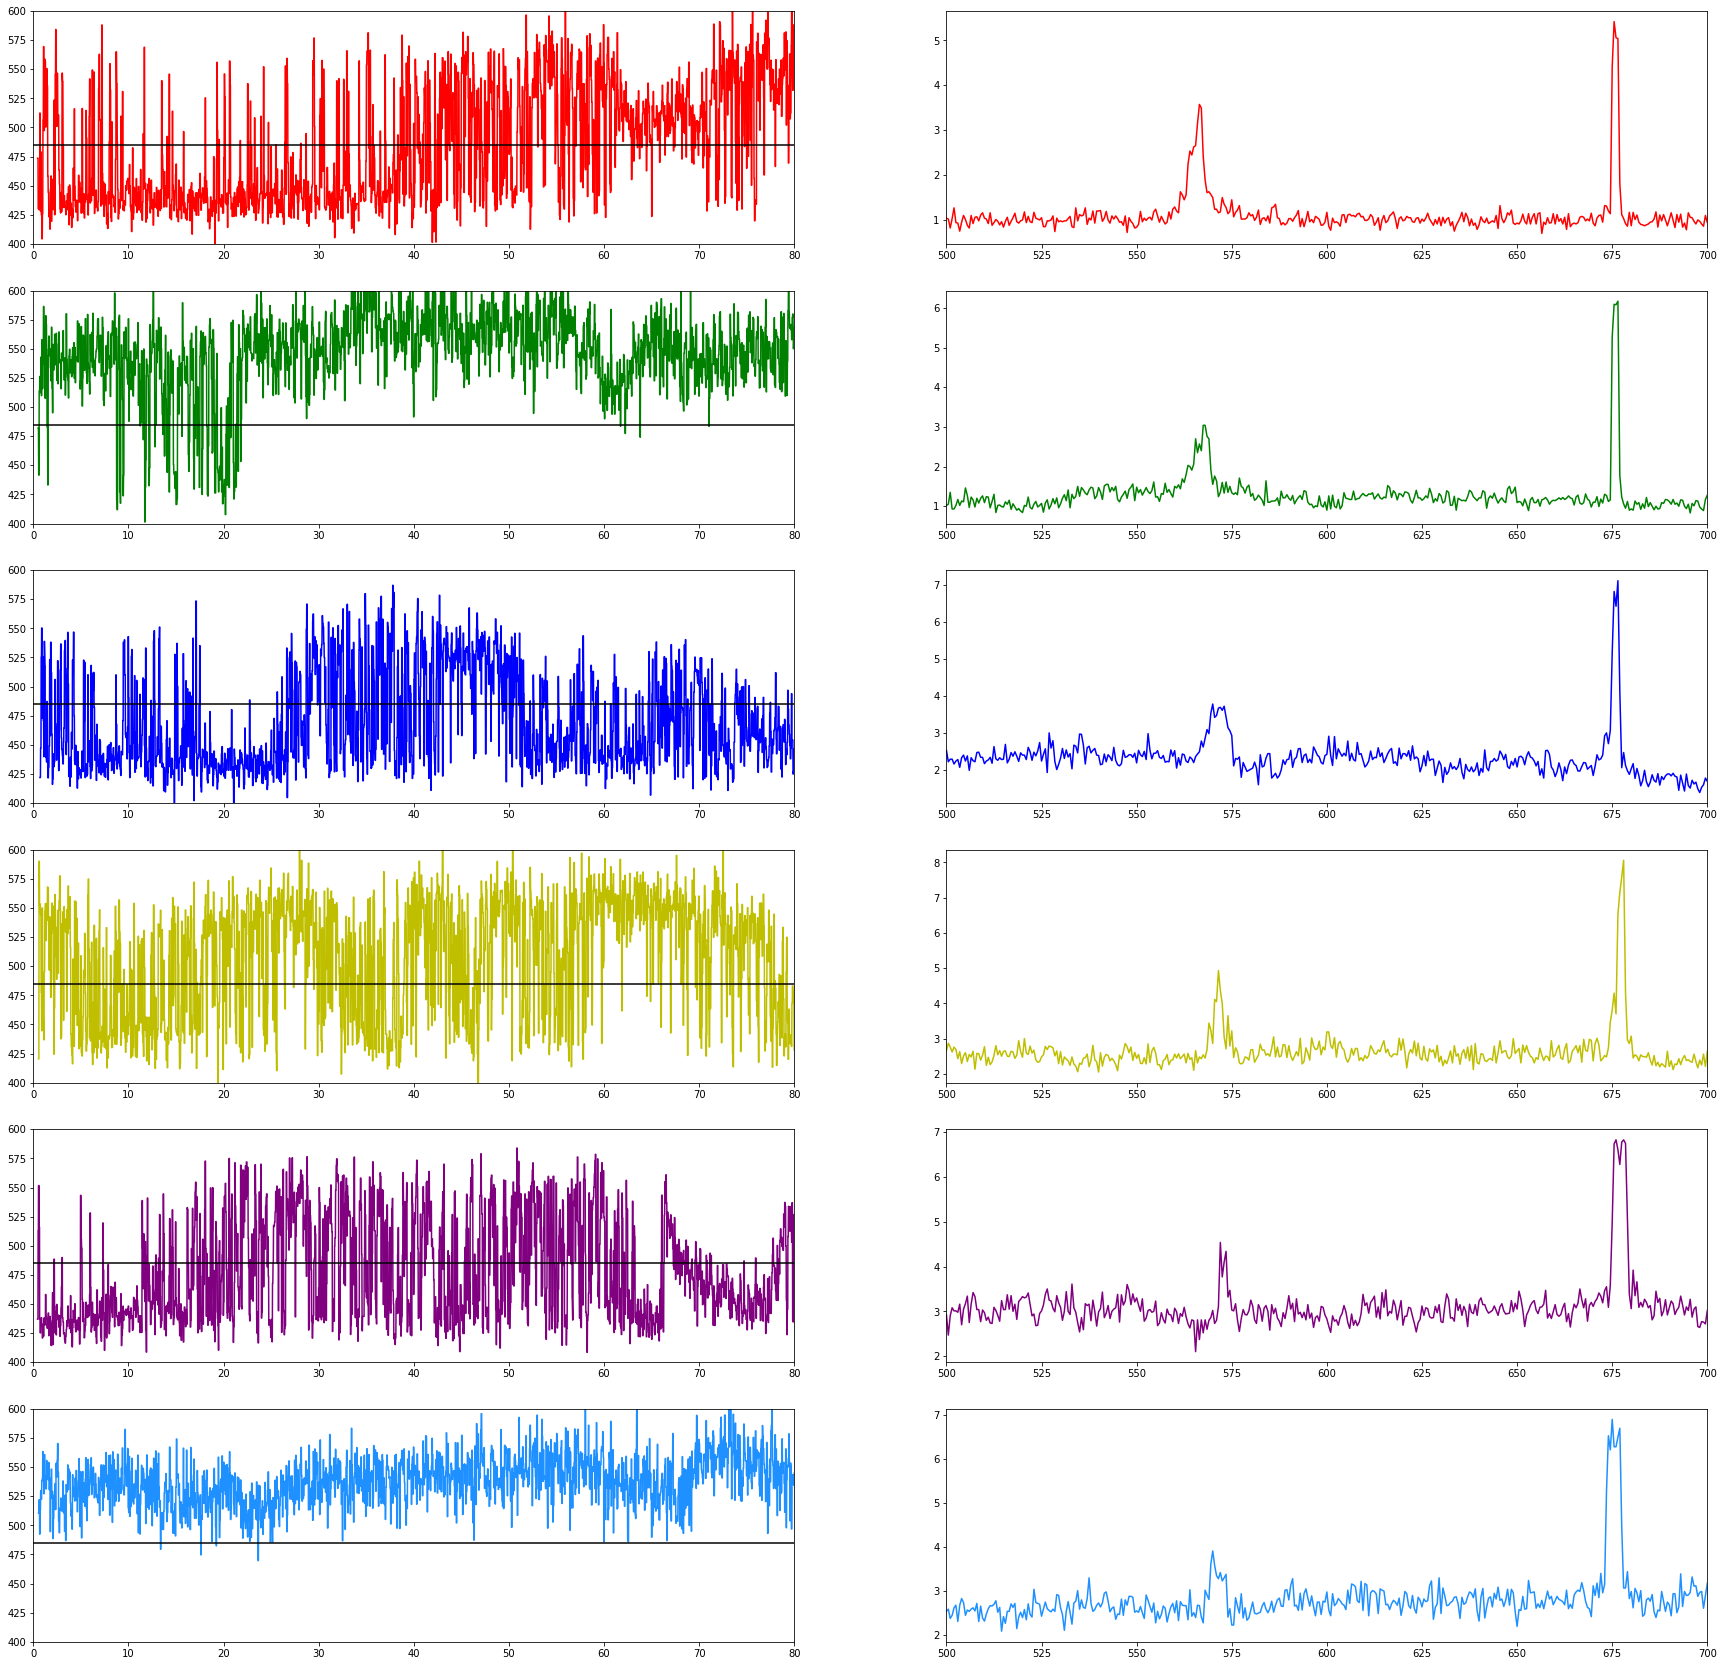

In [85]:
fig, ax = plt.subplots(6, 2, figsize = (30,30))
colors = ['r', 'g', 'b', 'y', 'purple','dodgerblue']

for i,run in enumerate(data):
    ax[i][0].plot(run[:,0], run[:,1], color = colors[i])
    ax[i][0].set_ylim([400,600])
    ax[i][0].set_xlim([0,80])
    ax[i][0].axhline(y = 485, color='k')

    
for i,run in enumerate(tickles):
    ax[i][1].plot(np.array(run[:,0])/1e3, run[:,1], color = colors[i])
    ax[i][1].set_xlim([500,700])




In [79]:
discrim = 485

fracHigh = []

for run in data:
    n = 0
    numHigh = 0
    while run[:,0][n] < 80:
        if run[:,1][n] > discrim:
            numHigh += 1
        else:
            pass
        n += 1
    fracHigh.append(float(numHigh)/n)

print fracHigh

[0.4418355024822219, 0.9413535803115591, 0.33170533170533173, 0.6484188147754452, 0.387339473342846, 0.9972181745926613]


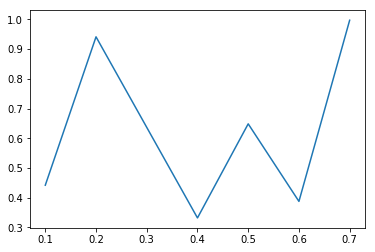

In [82]:
plt.plot(M5, fracHigh)

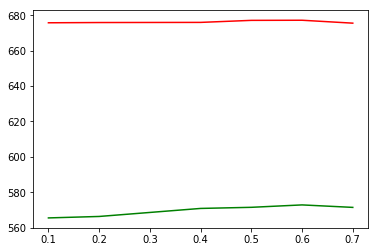

In [84]:
plt.plot(M5, fhigh, color='r')
plt.plot(M5, flow,color='g')

[1.0, 0.39241717497906947, 0.0]


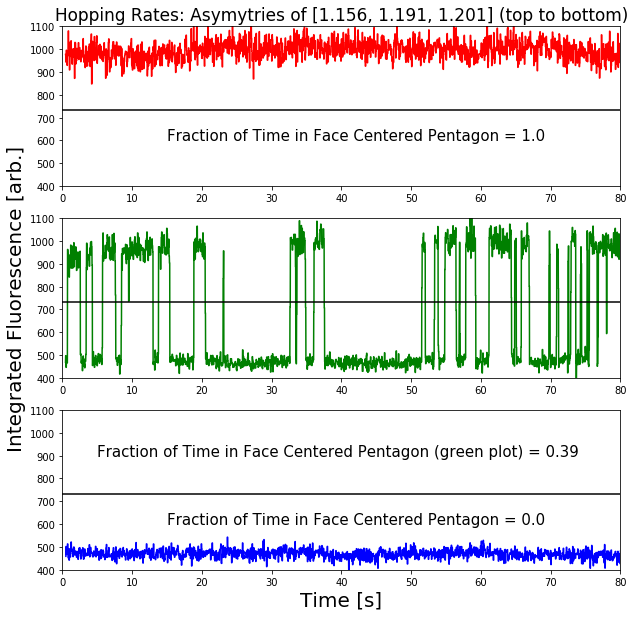

In [26]:
new_data = [54, 52, 53, 55]
good_data = []
M5 = [5.25, 5.5, 5.75, 6.0]

new_data = [54, 53, 55]
M5 = [5.25, 5.75, 6.0]

flow = [570.042, 563.672, 560.024, 556.990]
fhigh = [658.917, 662.982, 667.106, 669.364]


flow = [570.042, 560.024, 556.990]
fhigh = [658.917, 667.106, 669.364]

for num in new_data:
    ss = path + 'image_fluorescence.dir/000%s - image_fluorescence.csv'  % (str(num))
    good_data.append(np.loadtxt(ss, delimiter = ','))

fig, ax = plt.subplots(3, 1, figsize = (10,10))
colors = ['r', 'g', 'b', 'y', 'purple','dodgerblue']

for i,run in enumerate(good_data):
    ax[i].plot(run[:,0], run[:,1], color = colors[i])
    ax[i].set_ylim([400,1100])
    ax[i].set_xlim([0,80])
    ax[i].axhline(y = 731, color='k')
    if i == 0:
        ax[i].set_title('Hopping Rates: Asymytries of [1.156, 1.191, 1.201] (top to bottom)', fontsize = 17)
        ax[i].text( 15, 600, 'Fraction of Time in Face Centered Pentagon = 1.0', fontsize = 15)
    if i == 1:
        ax[i].set_ylabel('Integrated Fluorescence [arb.]', fontsize = 20)
        
    if i == 2:
        ax[i].set_xlabel('Time [s]', fontsize = 20)
        ax[i].text( 5, 900, 'Fraction of Time in Face Centered Pentagon (green plot) = 0.39', fontsize = 15)
        ax[i].text( 15, 600, 'Fraction of Time in Face Centered Pentagon = 0.0', fontsize = 15)


discrim = (np.average(good_data[1][:,1]) + np.average(good_data[2][:,1]))/2.
fracHigh = []

for run in good_data:
    n = 0
    numHigh = 0
    while run[:,0][n] < 80:
        if run[:,1][n] > discrim:
            numHigh += 1
        else:
            pass
        n += 1
    fracHigh.append(float(numHigh)/n)

print fracHigh

asym = []
for i in range(3):
    asym.append(fhigh[i]/flow[i])


plt.savefig(path + '/6_ion_hopping_rate_plots.pdf')

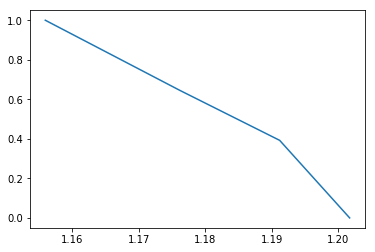

In [103]:
plt.plot(asym, fracHigh)